<a href="https://colab.research.google.com/github/MhdZakiAlHafiz/pembelajaran-mesin-Mhd-Zaki-Al-Hafiz-2211533004/blob/main/prak_ML_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
from sklearn import svm

#visualisasi
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

#chart
%matplotlib inline

#pickle
import pickle

In [20]:
pd=pd.read_csv("recipes_muffins_cupcakes.csv")
pd.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


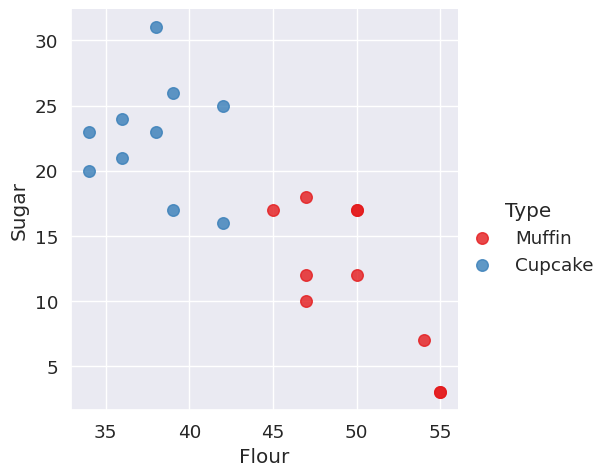

In [21]:
sns.lmplot(x="Flour", y="Sugar", data=pd, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [22]:
bahan = pd[['Flour', 'Sugar']].to_numpy()
type_label = np.where(pd['Type']=='Muffin', 0, 1)

pd_features = pd.columns.values[1:].tolist()
pd_features

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [23]:
#smv model
model = svm.SVC(kernel='linear')
model.fit(bahan, type_label)

#pemisah hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

#pemisah plot paralel
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx +(b[1] - a * b[0])

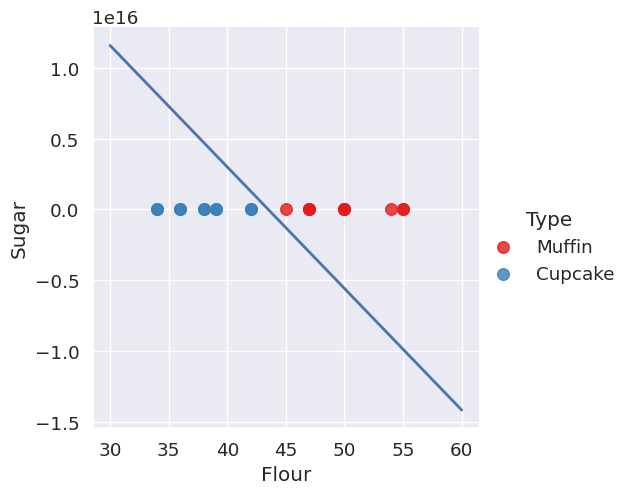

In [24]:
#plot dan hyperlane
sns.lmplot(x="Flour", y="Sugar", data=pd, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70});

plt.plot(xx, yy, linewidth=2, color='b')

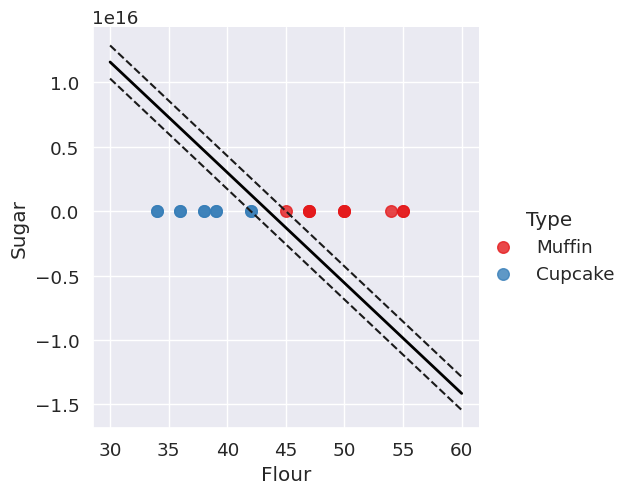

In [26]:
# Lihat margin dan support vectornya
sns.lmplot(x='Flour', y='Sugar', data=pd, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

In [27]:
# Buat fungsi untuk memprediksi kapan resep itu apakah itu muffin atau cupcake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')


In [28]:
# Prediksi jika menggunakan bahan: 50 tepung dan 20 gula
muffin_or_cupcake(50, 20)

You're looking at a muffin recipe!


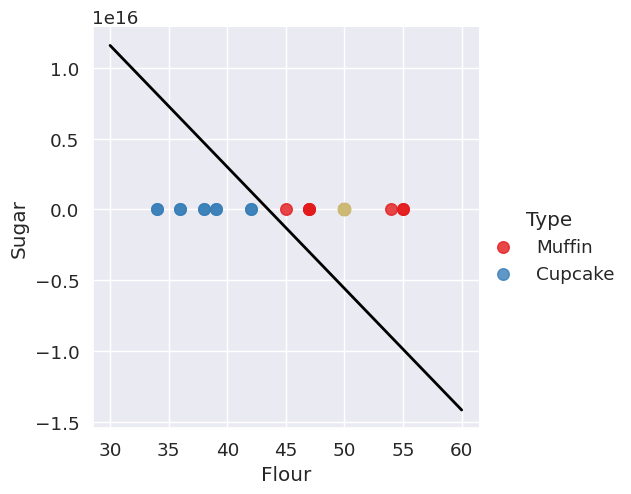

In [30]:
# Tampilkan titik plot untuk melihat secara visual di mana titik itu berada
sns.lmplot(x='Flour', y='Sugar', data=pd, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(50, 20, 'yo', markersize='9');


In [31]:
# Prediksi jika memakai bahan: 40 tepung dan 20 gula
muffin_or_cupcake(40,20)

You're looking at a cupcake recipe!


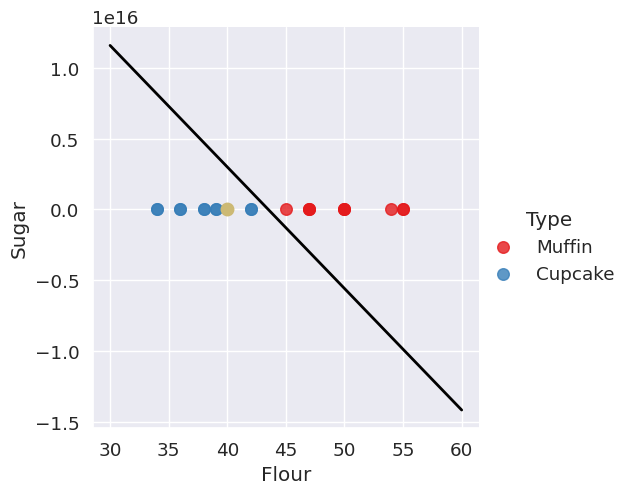

In [33]:
# Tampilkan titik plot untuk melihat secara visual di mana titik itu berada
sns.lmplot(x='Flour', y='Sugar', data=pd, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(40, 20, 'yo', markersize='9');

In [35]:
# melihat komposisi cupcake
muffin_cupcake_dict = {'muffin_cupcake_model': model, 'muffin_cupcake_features': ['Flour','Sugar'], 'all_features': pd_features}
muffin_cupcake_dict

{'muffin_cupcake_model': SVC(kernel='linear'),
 'muffin_cupcake_features': ['Flour', 'Sugar'],
 'all_features': ['Flour',
  'Milk',
  'Sugar',
  'Butter',
  'Egg',
  'Baking Powder',
  'Vanilla',
  'Salt']}